# Метод Адамса

6.4.4 (вариант 1)

dy/dx = y + x^2

y(0) = 1


In [1]:
import numpy as np
import scipy.linalg as sla
from math import sqrt, cos, log, e

In [2]:
a = np.array([[0, 0, 0, 0], [1/2, 0, 0, 0], [0, 1/2, 0, 0] ,[0, 0, 1, 0]])
c = np.array([0, 1/2, 1/2, 1])
b = np.array([1/6, 2/6, 2/6, 2/6])

In [3]:
def f(x, y):
	return y + x * x

In [13]:
def y_next_runge_kut(y, x, h, a, b, c):
	
	s = a.shape[0]
	k = np.zeros((s))
	for i in range (0, s):
		yi = y
		xi = x + c[i] * h
		for j in range(0, i):
			a_ij = a[i, j]
			k_j = k[j]
			yi = yi +  a_ij * h * k_j
		k[i] = f(xi, yi)
	
	result = y
	for i in range(0, s):
		result = result + h * b[i] * k[i]

	return result

In [5]:
def y_next_adams(y2, y1, y0, x3, x2, x1, x0, h):
    const_part = y2 + h * (19/24 * f(x2, y2) - 5/24 * f(x1, y1) + 1/24 * f(x0, y0))
    # f(y3) = y3 - const_part - h * 3/8 * f(x3, y3) = 0
    eps = 0.00000000000001
    # f'(y3) = 1 - 3/8 * h
    # lambda(x) = 1 / f'(y3)
    l = 1 / (1 - 3 / 8 * h)
    y3 = y2
    f_y3 = y3 - const_part - h * 3/8 * f(x3, y3)
    while abs(f_y3) > eps:
        y3 = y3 - l * f_y3
        f_y3 = y3 - const_part - h * 3/8 * f(x3, y3)     
    return y3

In [6]:
import matplotlib.pyplot as plt

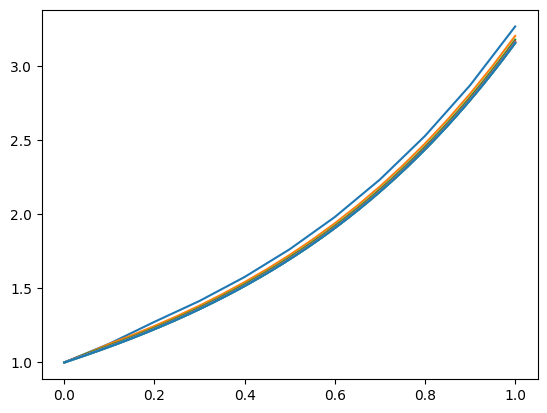

In [31]:
h_list = [0.1]
n = 10 # h-count
k = 4
for i in range(0, n):
    h_list.append(h_list[i] / 2)
y_list = []
x_list =[]

for h in h_list:
    y = [1.0]
    x = [0.0]
    for i in range(0, k - 2):
        x.append(x[i] + h)
        y.append(y_next_runge_kut(y[i], x[i] + h, h, a, b, c))
    for i in range(k - 2, int(1 / h)):
        x.append(x[i] + h)
        y.append(y_next_adams(y[i], y[i - 1], y[i - 2], x[i + 1], x[i], x[i - 1], x[i - 2], h))
    y_list.append(y)
    x_list.append(x)
    plt.plot(x, y)
    # plt.plot(y, yy)
plt.show()

2.5262397430098247
2.1554173513889547
2.0432381621670417
2.012201562569355
2.0036613047329777
2.0012112478663027
2.0004496546142003
2.0001857009701984
2.0000830514484353


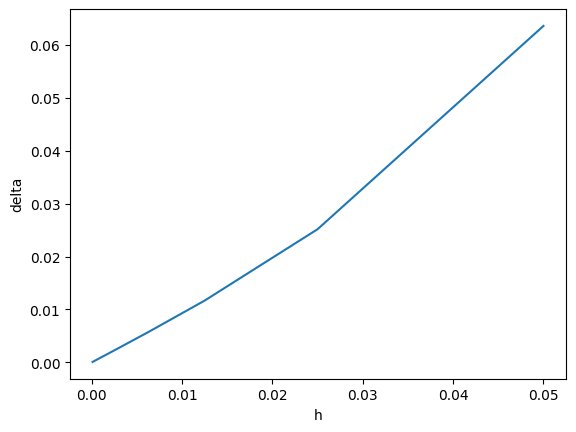

In [32]:
h_current = h_list[0]
x_current = x_list[0]
y_current = y_list[0]

h_prev = h_current
x_prev = x_current
y_prev = y_current

h_v = []
delta_v = []

for i in range(1, len(h_list)):
    max_delta = 0
 
    h_prev = h_current
    x_prev = x_current
    y_prev = y_current
    h_current = h_list[i]
    x_current = x_list[i]
    y_current = y_list[i]
    for j in range (3, len(x_prev)):
        if abs(y_current[2 * j] - y_prev[j]) > max_delta:
            max_delta = abs(y_current[2 * j] - y_prev[j])
    h_v.append(h_current)
    delta_v.append((max_delta))
plt.plot(h_v, delta_v)
plt.xlabel(r"h")
plt.ylabel(r"delta")
plt.show

delta_current = delta_v[0]
for i in range(1, len(delta_v)):
    delta_prev = delta_current
    delta_current = delta_v[i]
    print(delta_prev / delta_current)

    

In [26]:
def ff(x):
    return 3 * e**x - x * x - 2 * x - 2

2.3181861016275644
2.0911652069680753
2.0252882389634825
2.007208916266839
2.0022052599068267
2.0007481257773083
2.0002848713463743
2.0001200682781595
2.000054438698572
2.0000258251498146


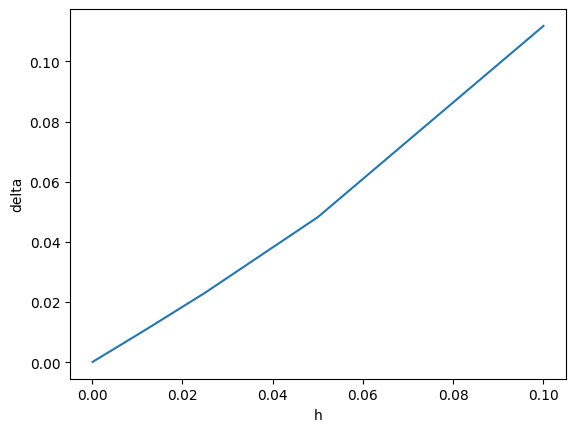

In [33]:
h_current = h_list[0]
x_current = x_list[0]
y_current = y_list[0]

h_v = []
delta_v = []

for i in range(0, len(h_list)):
    max_delta = 0

    h_current = h_list[i]
    x_current = x_list[i]
    y_current = y_list[i]
    for j in range (0, len(x_current)):
        if abs(y_current[j] - ff(x_current[j])) > max_delta:
            max_delta = abs(y_current[j] - ff(x_current[j]))
    h_v.append(h_current)
    delta_v.append(max_delta)
plt.plot(h_v, delta_v)
plt.xlabel(r"h")
plt.ylabel(r"delta")
plt.show

delta_current = delta_v[0]
for i in range(1, len(delta_v)):
    delta_prev = delta_current
    delta_current = delta_v[i]
    print(delta_prev / delta_current)
    